# **Lab 6: Random Forest & ExtraTrees**


## Exercise 2: Binary Classification with Automated Hyperparameter Tuning

We are going to use a modified version of the dataset from UCI Machine Learning Repository which contains the income census data for 30718 americans (https://archive.ics.uci.edu/ml/datasets/Adult).

You will import the prepared dataset from the following link:
https://github.com/aso-uts/labs_datasets/tree/main/36106-mlaa/lab06/ex2


The steps are:
1.   Load Dataset
2.   Hyperparameter Tuning with Grid Search
3.   Hyperparameter Tuning with Random Search


---
### 0. Setup Environment

In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

lab = LabExFolder(
  course_code="36106",
  lab="lab06",
  exercise="ex02"
)
lab.run()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00
Mounted at /content/gdrive

You can now save your data files in: /content/36106/labs/lab06/ex02/data


In [2]:
import warnings
warnings.simplefilter(action='ignore')

### 1. Load Dataset

**[1.1]** Import the pandas and numpy package

In [3]:
# Placeholder for student's code

In [4]:
# Solution
import pandas as pd
import numpy as np

**[1.2]** Load the features `X` and target `y` variables for the training, validation and testing sets

In [5]:
# Placeholder for student's code

In [6]:
# Solution
X_train = pd.read_csv('https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab06/ex2/X_train.csv', index_col=0)
X_val = pd.read_csv('https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab06/ex2/X_val.csv', index_col=0)
X_test = pd.read_csv('https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab06/ex2/X_test.csv', index_col=0)
y_train = pd.read_csv('https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab06/ex2/y_train.csv', index_col=0)
y_val = pd.read_csv('https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab06/ex2/y_val.csv', index_col=0)
y_test = pd.read_csv('https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab06/ex2/y_test.csv', index_col=0)

**[1.3]** Display the dimensions (shape) of the features for the training, validation and testing sets

In [7]:
# Placeholder for student's code

In [8]:
# Solution
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(19659, 39)
(4915, 39)
(6144, 39)


## 2. Hyperparameter Tuning with Grid Search

**[2.1]** Import GridSearchCV from sklearn.model_selection


In [9]:
# Placeholder for student's code

In [10]:
# Solution
from sklearn.model_selection import GridSearchCV

**[2.2]** Let's create a dictionary containing the grid search parameters


In [11]:
hyperparams_grid = {
    'n_estimators': np.arange(10, 100, 20),
    'max_depth': np.arange(5, 30, 5),
    'min_samples_leaf': np.arange(2, 20, 4)
    }
hyperparams_grid

{'n_estimators': array([10, 30, 50, 70, 90]),
 'max_depth': array([ 5, 10, 15, 20, 25]),
 'min_samples_leaf': array([ 2,  6, 10, 14, 18])}

**[2.3]** Import the RandomForestClassifier from sklearn.ensemble and instantiate the RandomForestClassifier class called rf with a random state=8

In [12]:
# Placeholder for student's code

In [13]:
# Solution
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=8)

**[2.4]** Instantiate a GridSearchCV with the hyperparameter grid and the random forest model

In [14]:
# Placeholder for student's code

In [15]:
# Solution
grid_search_rf = GridSearchCV(rf, hyperparams_grid, cv=2, verbose=1)

**[2.5]** Fit the GridSearchCV on the training set

In [16]:
# Placeholder for student's code

In [17]:
# Solution
grid_search_rf.fit(X_train, y_train)

Fitting 2 folds for each of 125 candidates, totalling 250 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25]),
                         'min_samples_leaf': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': array([10, 30, 50, 70, 90])},
             verbose=1)

**[2.6]** Display the best set of hyperparameters

In [18]:
# Placeholder for student's code

In [19]:
# Solution
grid_search_rf.best_params_

{'max_depth': np.int64(20),
 'min_samples_leaf': np.int64(6),
 'n_estimators': np.int64(90)}

**[2.6]** Display the accuracy score on all 3 sets

In [20]:
# Placeholder for student's code

In [21]:
# Solution
print(grid_search_rf.score(X_train, y_train))
print(grid_search_rf.score(X_val, y_val))
print(grid_search_rf.score(X_test, y_test))

0.8513657866625973
0.8439471007121058
0.84130859375


## 3. Hyperparameter Tuning with Random Search

**[3.1]** Import randint from scipy.stats

In [22]:
# Placeholder for student's code

In [23]:
# Solution
from scipy.stats import randint

**[3.2]** Let's define the hyperparameters value randomly

In [24]:
hyperparams_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(5, 30),
    'min_samples_leaf': randint(2, 20)
    }

**[3.3]** Import RandomizedSearchCV and KFold from sklearn.model_selection

In [25]:
# Placeholder for student's code

In [26]:
# Solution
from sklearn.model_selection import RandomizedSearchCV, KFold

**[3.4]** Instantiate a KFold with 5 splits

In [27]:
# Placeholder for student's code

In [28]:
# Solution
kf_cv = KFold(n_splits=5)

**[3.5]** Instantiate a RandomizedSearchCV with the hyperparameter values and the random forest model

In [29]:
# Placeholder for student's code

In [30]:
# Solution
random_search_rf = RandomizedSearchCV(rf, hyperparams_dist, random_state=8, cv=kf_cv, verbose=1)

**[3.6]** Fit the RandomizedSearchCV on the training set

In [31]:
# Placeholder for student's code

In [32]:
# Solution
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=8),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e9da4f8aa50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e9da4fef8d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e9da4f79d10>},
                   random_state=8, verbose=1)

**[3.7]** Display the best set of hyperparameters

In [33]:
# Placeholder for student's code

In [34]:
# Solution
random_search_rf.best_params_

{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 69}

**[3.8]** Display the accuracy score on all 3 sets

In [35]:
# Placeholder for student's code

In [36]:
# Solution
print(random_search_rf.score(X_train, y_train))
print(random_search_rf.score(X_val, y_val))
print(random_search_rf.score(X_test, y_test))

0.8597588890584466
0.8447609359104782
0.84130859375


**[3.9]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [37]:
# Placeholder for student's code

In [38]:
# Solution
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[3.10]** Task: Plot the confusion matrics for the training, validation and testing sets

In [39]:
# Placeholder for student's code

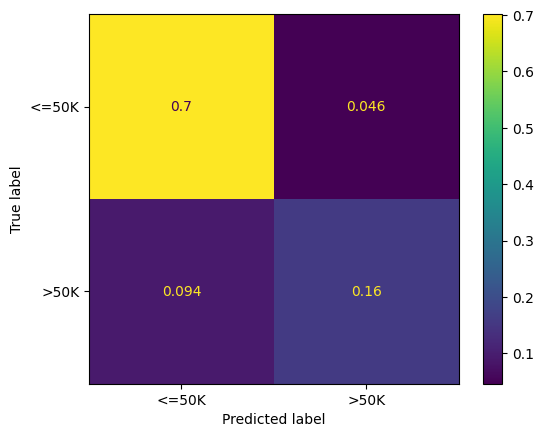

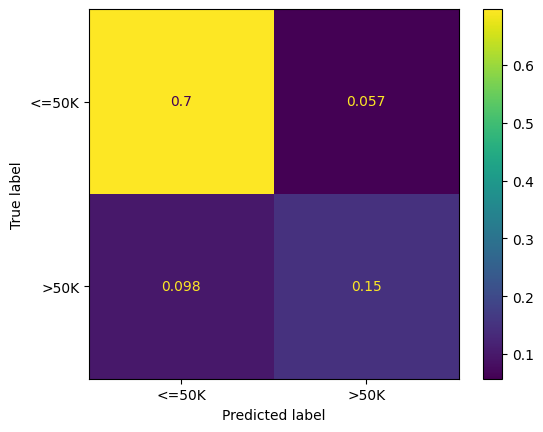

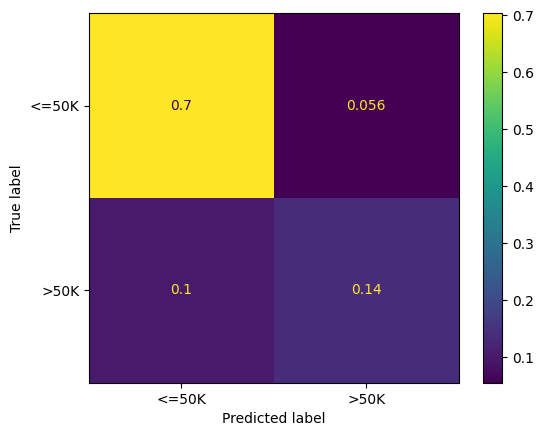

In [40]:
# Solution
ConfusionMatrixDisplay.from_estimator(random_search_rf, X_train, y_train, normalize='all')
ConfusionMatrixDisplay.from_estimator(random_search_rf, X_val, y_val, normalize='all')
ConfusionMatrixDisplay.from_estimator(random_search_rf, X_test, y_test, normalize='all')